In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
train=pd.read_csv("Train_data.csv")
print(train)

       duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0             0           tcp  ftp_data    SF        491          0     0   
1             0           udp     other    SF        146          0     0   
2             0           tcp   private    S0          0          0     0   
3             0           tcp      http    SF        232       8153     0   
4             0           tcp      http    SF        199        420     0   
...         ...           ...       ...   ...        ...        ...   ...   
25187         0           tcp      exec  RSTO          0          0     0   
25188         0           tcp  ftp_data    SF        334          0     0   
25189         0           tcp   private   REJ          0          0     0   
25190         0           tcp      nnsp    S0          0          0     0   
25191         0           tcp    finger    S0          0          0     0   

       wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0           

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [9]:
train.describe()
#train.describe() it gives the statistical values of each column data file
#train.columns() it returns the columns data.

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
row,col=train.shape
print(row,col) #returns the rows and colns values.

25192 42


In [14]:
for i in range(1,4):
    L=train.iloc[:,i].unique().tolist() #
    print(L)
    for j in range(row):
        train.iloc[j,i]=L.index(train.iloc[j,i])

['tcp', 'udp', 'icmp']
['ftp_data', 'other', 'private', 'http', 'remote_job', 'name', 'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u', 'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp', 'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap', 'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois', 'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login', 'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u', 'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell', 'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i', 'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i', 'http_8001']
['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3', 'S2', 'OTH']


In [16]:
print(train.head)

<bound method NDFrame.head of        duration protocol_type service flag  src_bytes  dst_bytes  land  \
0             0             0       0    0        491          0     0   
1             0             1       1    0        146          0     0   
2             0             0       2    1          0          0     0   
3             0             0       3    0        232       8153     0   
4             0             0       3    0        199        420     0   
...         ...           ...     ...  ...        ...        ...   ...   
25187         0             0      43    5          0          0     0   
25188         0             0       0    0        334          0     0   
25189         0             0       2    2          0          0     0   
25190         0             0      54    1          0          0     0   
25191         0             0      10    1          0          0     0   

       wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                 

In [19]:
X_train=train.drop(['class'],axis=1)
Y_train=train['class']
print(Y_train)

0         normal
1         normal
2        anomaly
3         normal
4         normal
          ...   
25187    anomaly
25188    anomaly
25189    anomaly
25190    anomaly
25191    anomaly
Name: class, Length: 25192, dtype: object


<Axes: >

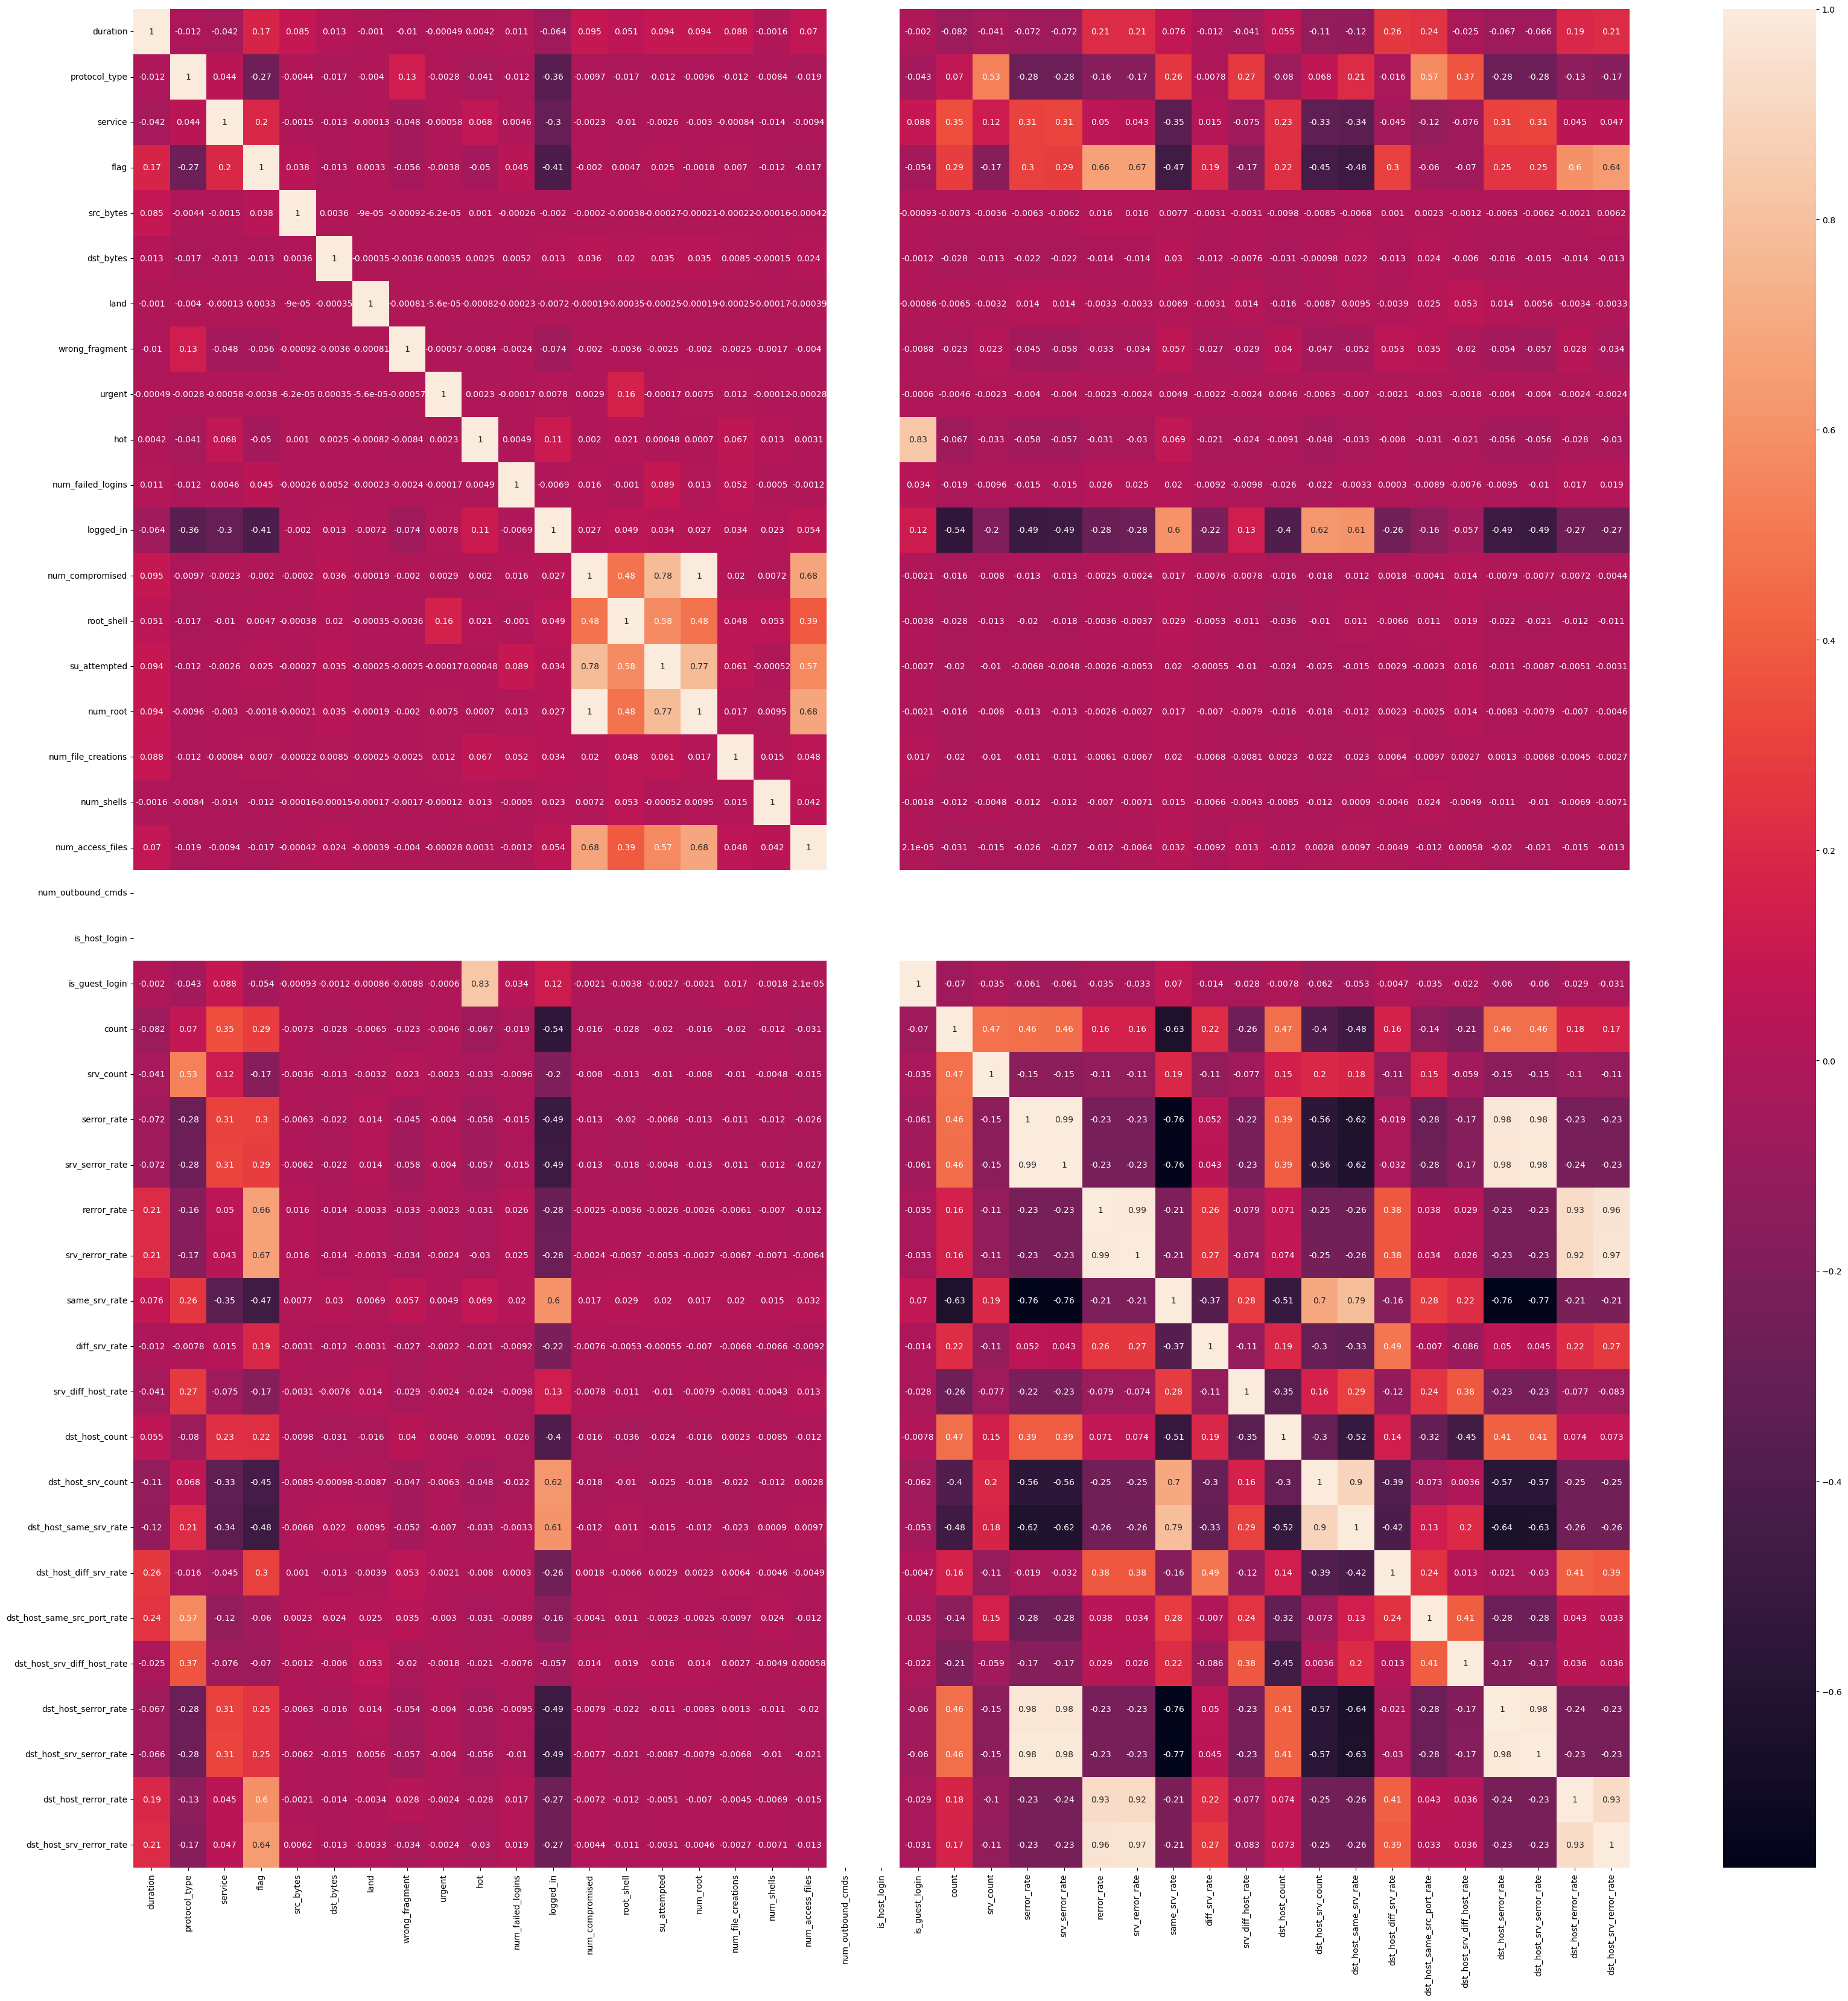

In [24]:
plt.figure(figsize=(40,40)) #its correlation value .
sns.heatmap(X_train.corr(),annot=True) # returns the correaltion matrix
#light color gives relation of one and another
#helps in deleting the highly corelated columns 



<Axes: xlabel='class', ylabel='count'>

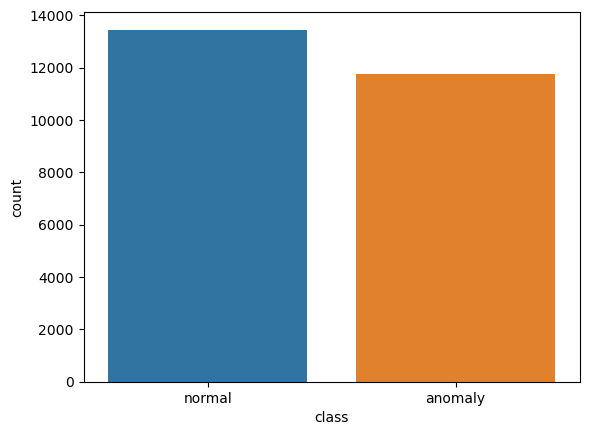

In [25]:
sns.countplot(x=Y_train) # helps in understanding whether the data is balanced or not.
#balanced_data:
#unbalanced_data:

[Text(0.5810423259493671, 0.9615384615384616, 'src_bytes <= 28.5\ngini = 0.498\nsamples = 6298\nvalue = [2932, 3366]'),
 Text(0.3125, 0.8846153846153846, 'dst_host_srv_count <= 154.0\ngini = 0.145\nsamples = 2883\nvalue = [2656, 227]'),
 Text(0.26424050632911394, 0.8076923076923077, 'dst_bytes <= 2.0\ngini = 0.077\nsamples = 2719\nvalue = [2610, 109]'),
 Text(0.20569620253164558, 0.7307692307692307, 'logged_in <= 0.5\ngini = 0.056\nsamples = 2680\nvalue = [2603, 77]'),
 Text(0.1518987341772152, 0.6538461538461539, 'dst_host_same_srv_rate <= 0.255\ngini = 0.043\nsamples = 2658\nvalue = [2600, 58]'),
 Text(0.08227848101265822, 0.5769230769230769, 'count <= 1.5\ngini = 0.008\nsamples = 2373\nvalue = [2364, 9]'),
 Text(0.05063291139240506, 0.5, 'dst_host_diff_srv_rate <= 0.07\ngini = 0.139\nsamples = 93\nvalue = [86, 7]'),
 Text(0.02531645569620253, 0.4230769230769231, 'src_bytes <= 15.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.012658227848101266, 0.34615384615384615, 'gini = 

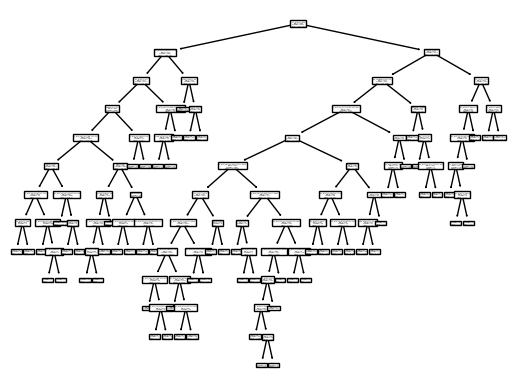

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train, train_size=0.25, random_state=2)
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtree=DecisionTreeClassifier()
dtree=dtree.fit(x_train,y_train)
tree.plot_tree(dtree,feature_names=list(x_train.columns))

In [35]:
dt_train,dt_test=dtree.score(x_train,y_train),dtree.score(x_test,y_test)
print(f"Train Score is {dt_train}")
print(f"Test Score is {dt_test}")



Train Score is 1.0
Test Score is 0.9903673123742988


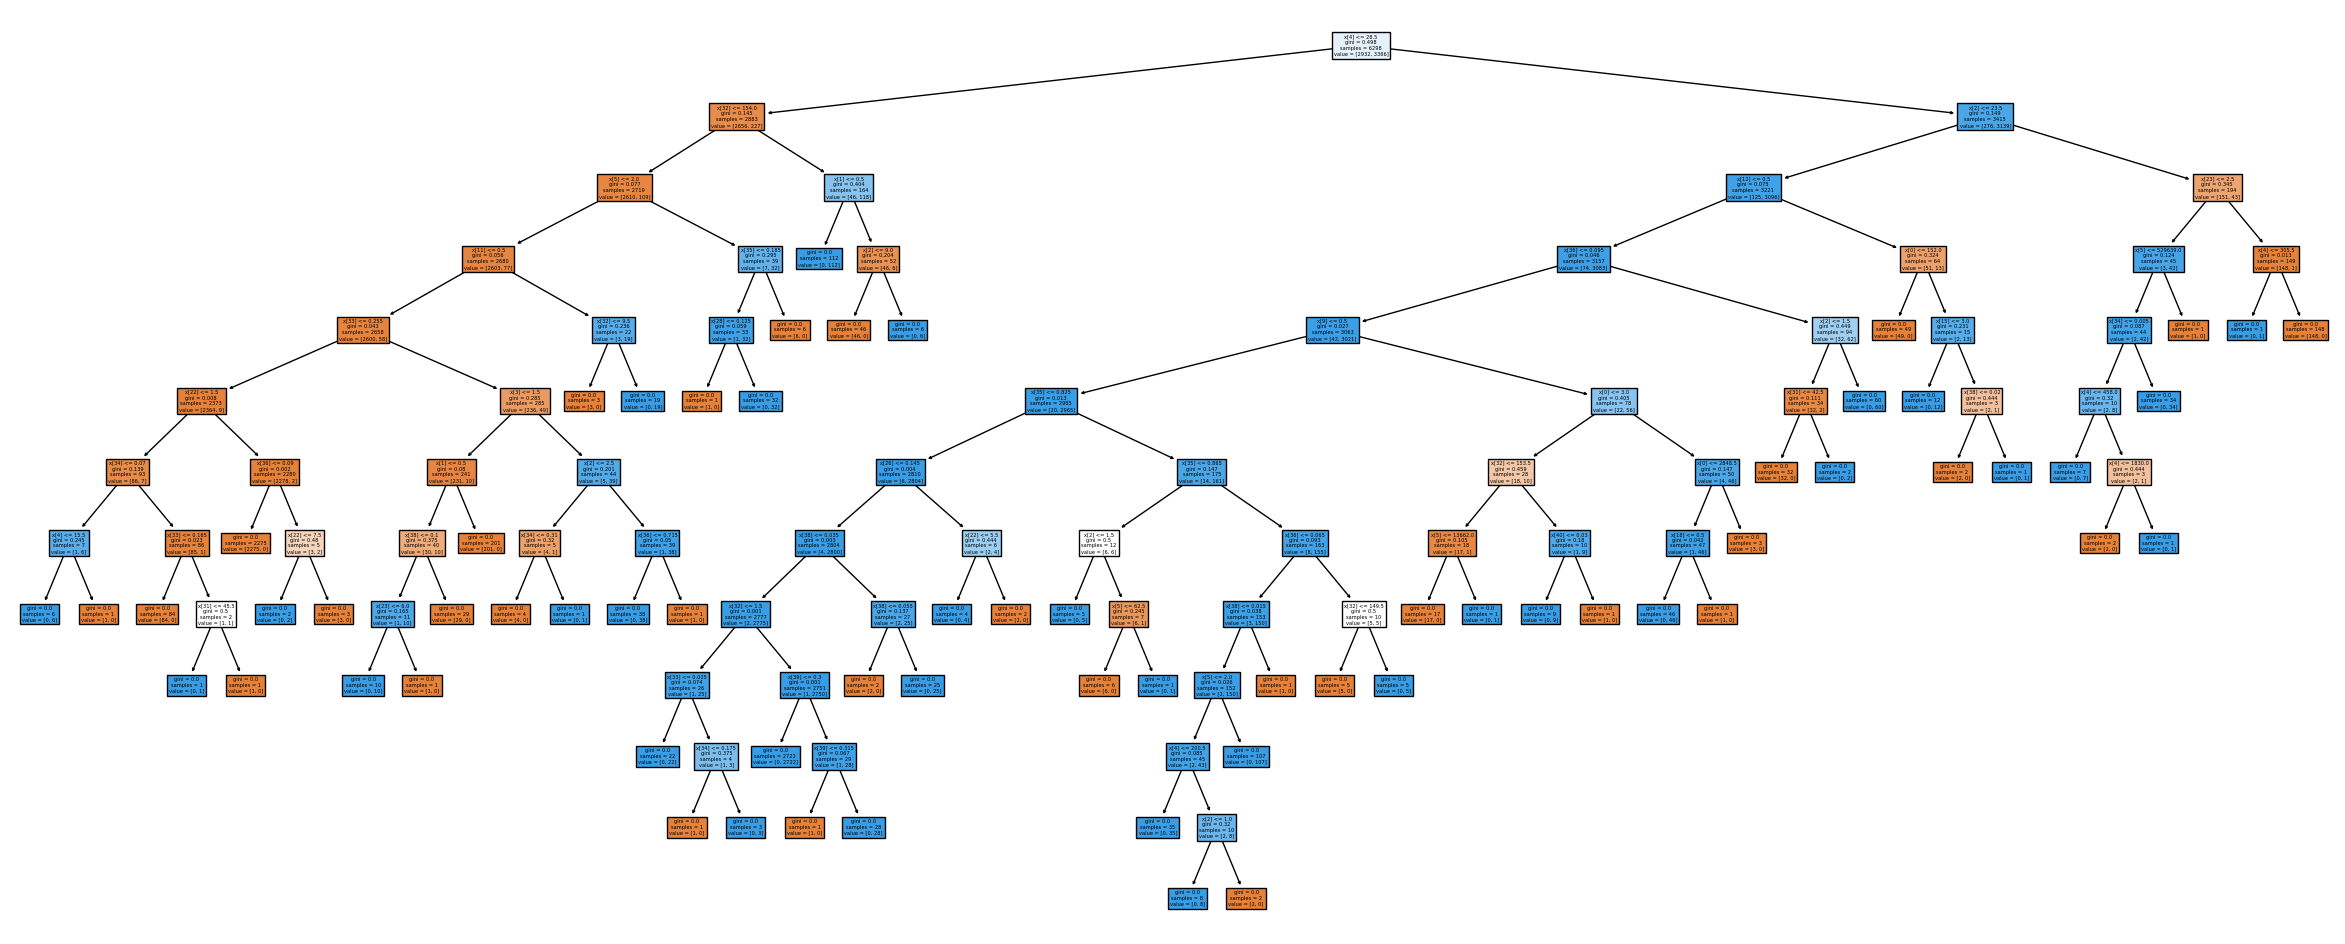

In [37]:
fig=plt.figure(figsize=(30,12))
tree.plot_tree(dtree,filled=True);
plt.show()
